# Sub-Project: BigMart Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#modeling">Modling</a></li>
<li><a href="#testing">Testing</a></li>
<li><a href="#saving">Saving</a></li>
    
    
</ul>

<a id='intro'></a>
# Introduction

> The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales. The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

<a id='wrangling'></a>
# Data Wrangling


## Importing Libraries and Loading The Dataset

In [88]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## General Properties 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- Data types are appropriately given. 

In [90]:
# check for duplicate rows
df.duplicated().sum()

0

In [91]:
# check for NaN values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- About 17% of the "Item_Weight" column data is missing.
- About 28% of the "Outlet_Size" column data is also missing.

In [92]:
df['Item_Weight'].median()

12.6

In [93]:
# we will replace the NaN values in the item weight column by the median (not mean to account for potenial outliers)
df["Item_Weight"] = df["Item_Weight"].fillna(12.6)

In [94]:
# we will replace the NaN values in the outlet size column by the mode
df["Outlet_Size"] = df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0])


In [95]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

- LF and low fat both correspond to Low Fat, so we need to standardaize it.
- Same with reg and Regular.

In [96]:
# Standardization 
df['Item_Fat_Content'].replace({'LF':'Low Fat',"low fat":"Low Fat","reg":"Regular"},inplace = True)
# Check
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

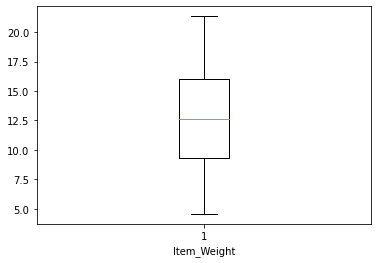

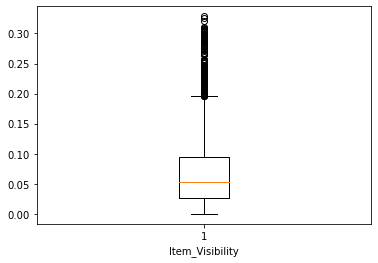

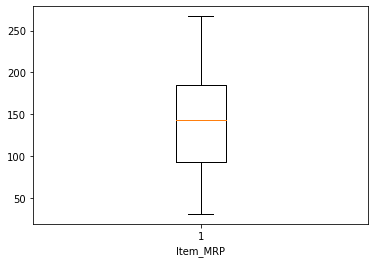

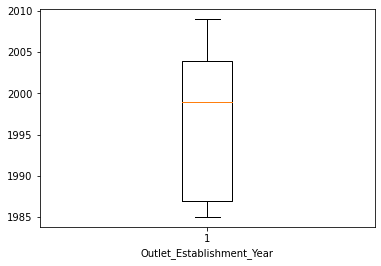

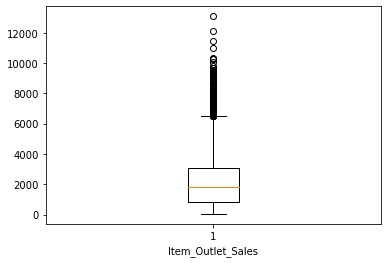

In [97]:
# exploring outliers 
for col in df.columns:
    if df[col].dtype != 'object': 
        plt.boxplot(df[col]);
        plt.xlabel(col)
        plt.show()

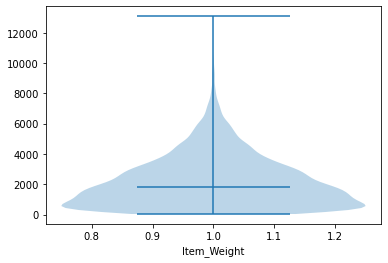

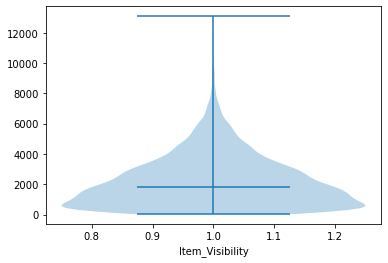

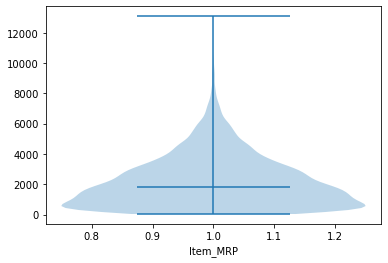

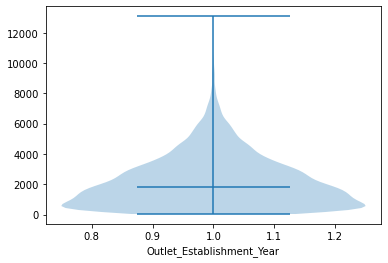

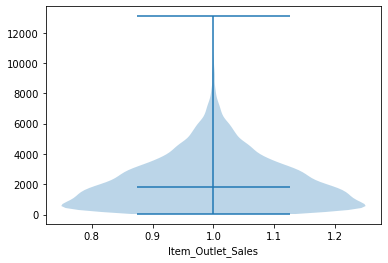

In [98]:
# violin plot
for col in df.columns:
    if df[col].dtype != 'object': 
        plt.violinplot(df.Item_Outlet_Sales, showmedians = True)
        plt.xlabel(col)
        plt.show()

<a id='eda'></a>
# Exploratory Data Analysis




## General Statistics and Relations 

In [99]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


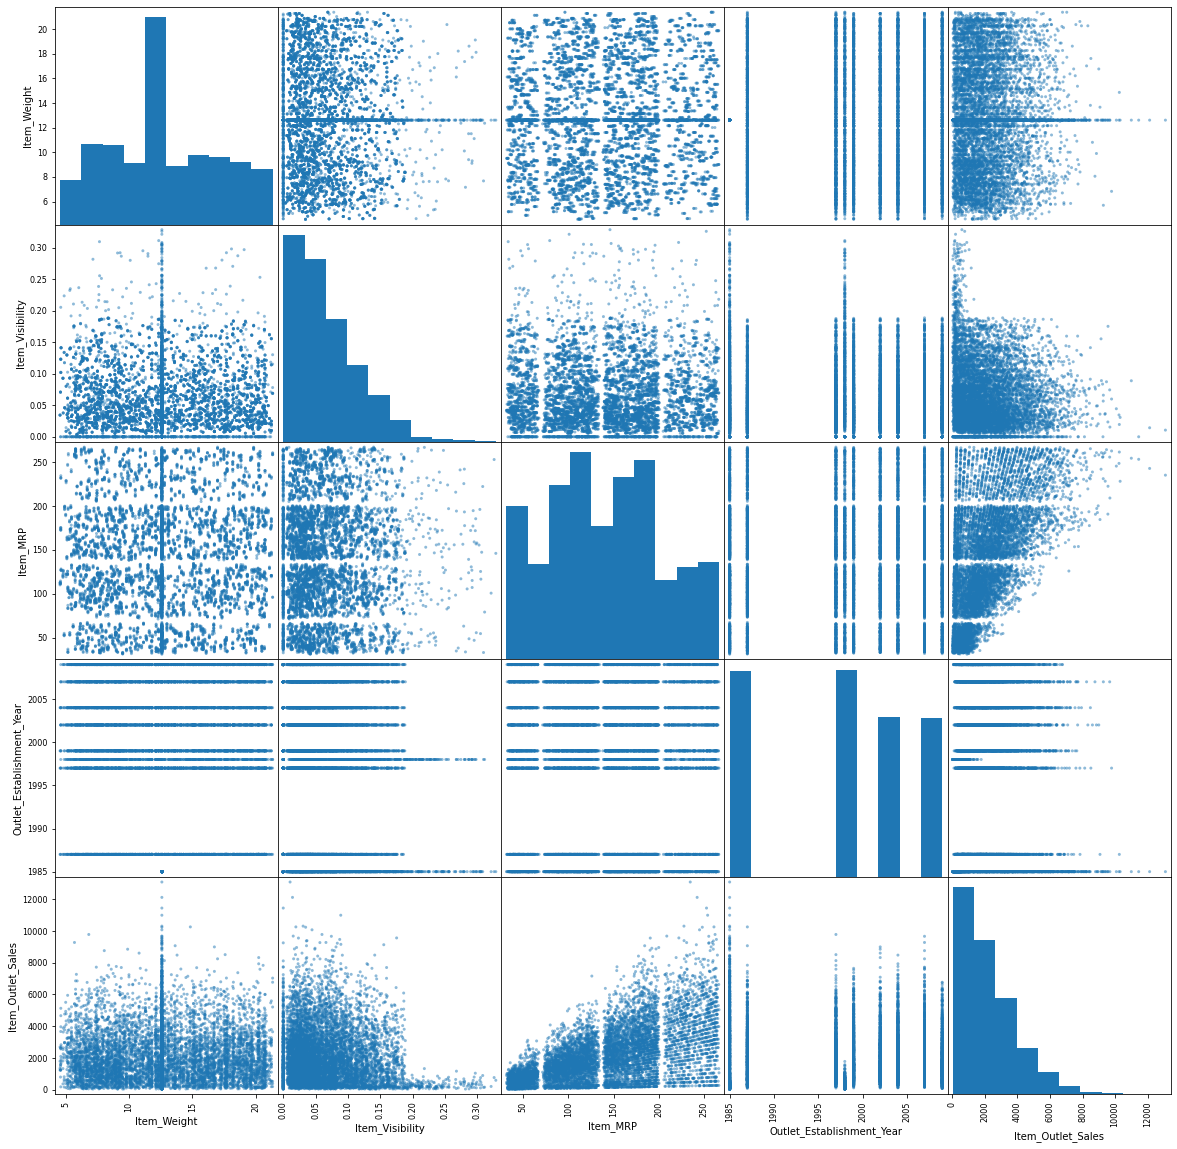

In [100]:
# General Overview 
pd.plotting.scatter_matrix(df, figsize = (20,20));

- Plainly, it can be seen that:
- Item visibility values tend to be very small for most items.
- Item outlet sales values have a right-skewed shape, which is something that makes sense.


## Research Questions
<a id='question1'></a> 

- Let's try to explore each variable separately and then find the relation between the variable and the sales. 

### Explore different IDs-related properties

In [101]:
len(df['Item_Identifier'].unique())

1559

In [102]:
df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending = False)

Item_Identifier
FDY55    42661.8008
FDA15    41584.5364
FDZ20    40185.0248
FDF05    36555.7490
FDA04    35741.4756
            ...    
FDQ04      784.3124
FDF38      771.6622
FDY43      673.7896
NCR42      332.9000
FDQ60      120.5098
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

In [103]:
series = df.groupby('Item_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending = False)
# gather all the IDs that correspond to sales values higher than the mean
idx = series[series > series.mean()].index
idx

Index(['FDY55', 'FDA15', 'FDZ20', 'FDF05', 'FDA04', 'FDK03', 'NCQ06', 'NCQ53',
       'FDJ55', 'FDD44',
       ...
       'FDC50', 'FDP24', 'FDM27', 'FDQ09', 'FDU22', 'FDP60', 'FDU07', 'FDU31',
       'FDY60', 'FDO21'],
      dtype='object', name='Item_Identifier', length=692)

In [104]:
high_sales_ids = df.loc[df["Item_Identifier"].isin(idx)]
high_sales_ids

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.100,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
...,...,...,...,...,...,...,...,...,...,...,...,...
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8517,FDF53,20.750,Regular,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850


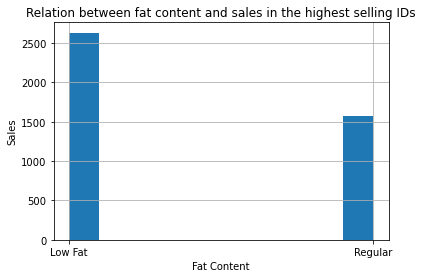

In [105]:
# The relation between the fat content and the sales
high_sales_ids["Item_Fat_Content"].hist()
plt.ylabel('Sales')
plt.xlabel('Fat Content')
plt.title('Relation between fat content and sales in the highest selling IDs');

- Seems like low fat products tend to have higher sales for the the best selling IDs, but let's see what the case is for the lowest selling IDs.

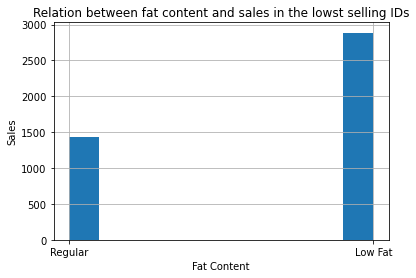

In [106]:
idx2 =  series[series<series.mean()].index
low_sales_ids = df.loc[df["Item_Identifier"].isin(idx2)]

low_sales_ids["Item_Fat_Content"].hist();
plt.ylabel('Sales')
plt.xlabel('Fat Content')
plt.title('Relation between fat content and sales in the lowst selling IDs');

- From the two previous plots, the fat content doesn't differentiate between the highest and lowest selling IDs.

### Explore general reations based on each items type
<a id='question2'></a> 

In [107]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [108]:
print(f'The dataset has {len(df["Item_Type"].unique())} unique item type.')

The dataset has 16 unique item type.


In [109]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

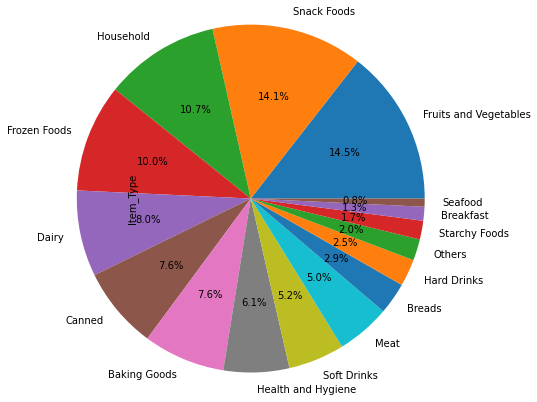

In [110]:
# display the items frequency using a pie chart
df['Item_Type'].value_counts().plot(kind = 'pie', radius = 2,autopct = '%0.1f%%');

In [111]:
df.groupby('Item_Type')['Item_Visibility'].mean().sort_values(ascending = False)

Item_Type
Breakfast                0.085723
Seafood                  0.074976
Dairy                    0.072427
Baking Goods             0.069169
Fruits and Vegetables    0.068513
Canned                   0.068129
Starchy Foods            0.067564
Snack Foods              0.066850
Breads                   0.066255
Frozen Foods             0.065645
Hard Drinks              0.064943
Soft Drinks              0.063972
Meat                     0.062284
Household                0.061322
Others                   0.060241
Health and Hygiene       0.055216
Name: Item_Visibility, dtype: float64

- The Breakfast data almost has the lowest percentage in terms of frequency, but it also has the highest value of visibility. Does it mean that breakfast products acquire a very large area of each given store? Same for seafood.

#### Let's delve deeper into the top selling item types.

In [112]:
df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False)

Item_Type
Fruits and Vegetables    2.820060e+06
Snack Foods              2.732786e+06
Household                2.055494e+06
Frozen Foods             1.825735e+06
Dairy                    1.522594e+06
Canned                   1.444151e+06
Baking Goods             1.265525e+06
Health and Hygiene       1.045200e+06
Meat                     9.175656e+05
Soft Drinks              8.928977e+05
Breads                   5.532372e+05
Hard Drinks              4.577934e+05
Starchy Foods            3.514013e+05
Others                   3.255176e+05
Breakfast                2.322990e+05
Seafood                  1.488682e+05
Name: Item_Outlet_Sales, dtype: float64

In [113]:
# Top 2 selling items will be chosen 
top2_selling_items = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False).index[:2]
df_top2_selling_items = df.loc[df["Item_Type"].isin(top2_selling_items)]
df_top2_selling_items

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.600,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
12,FDX32,15.100,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
...,...,...,...,...,...,...,...,...,...,...,...,...
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,Medium,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,Medium,Tier 3,Grocery Store,424.7804
8510,FDN58,13.800,Regular,0.056862,Snack Foods,231.5984,OUT035,2004,Small,Tier 2,Supermarket Type1,7182.6504
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


### Explore general outlets info

In [114]:
print(f"BigMart has {len(df['Outlet_Identifier'].unique())} outlets")

BigMart has 10 outlets


Text(0, 0.5, 'Total Sales')

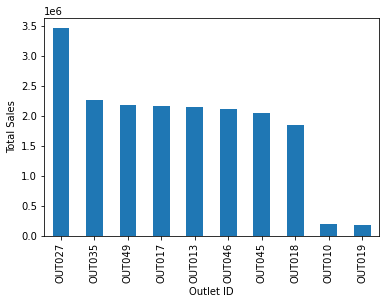

In [115]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending = False).plot(kind = 'bar');
plt.xlabel('Outlet ID')
plt.ylabel('Total Sales')

#### Explore the higest selling outlet in more details

In [116]:
highest_selling = df[df["Outlet_Identifier"]=="OUT027"]
highest_selling

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,12.6,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,12.6,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.6,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,12.6,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,12.6,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
...,...,...,...,...,...,...,...,...,...,...,...,...
8472,NCS41,12.6,Low Fat,0.053185,Health and Hygiene,182.9608,OUT027,1985,Medium,Tier 3,Supermarket Type3,1653.8472
8485,DRK37,12.6,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,12.6,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,12.6,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120


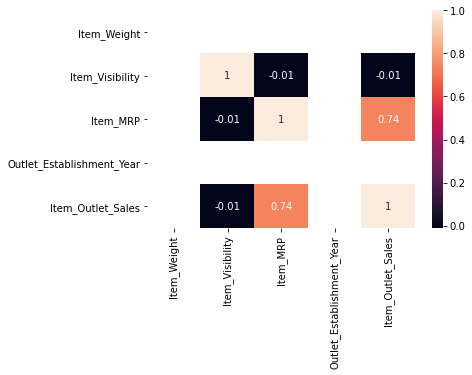

In [117]:
matrix = highest_selling.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

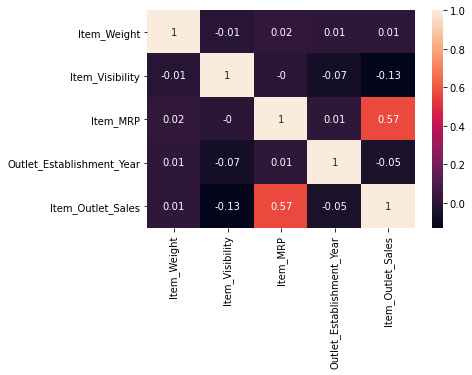

In [118]:
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

- Comparing the two previous heatmaps, the highest selling outlet benefits the most from items whose MRP rates are high (most sold items have high price).

#### Explore the two lowest selling outlets

In [119]:
lowest_selling = df.loc[df["Outlet_Identifier"].isin(["OUT019",'"OUT010"'])]
lowest_selling

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
23,FDC37,12.6,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,12.6,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
49,FDS02,12.6,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,12.6,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,12.6,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,12.6,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920
8458,FDX20,12.6,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440
8469,FDQ45,12.6,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216
8480,FDQ58,12.6,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020


In [120]:
highest_selling.mean()

Item_Weight                    12.600000
Item_Visibility                 0.058615
Item_MRP                      139.801791
Outlet_Establishment_Year    1985.000000
Item_Outlet_Sales            3694.038558
dtype: float64

In [121]:
lowest_selling.mean()

Item_Weight                    12.600000
Item_Visibility                 0.108441
Item_MRP                      139.787088
Outlet_Establishment_Year    1985.000000
Item_Outlet_Sales             340.329723
dtype: float64

- The main difference between the highest and lowest selling outlets is visibility 

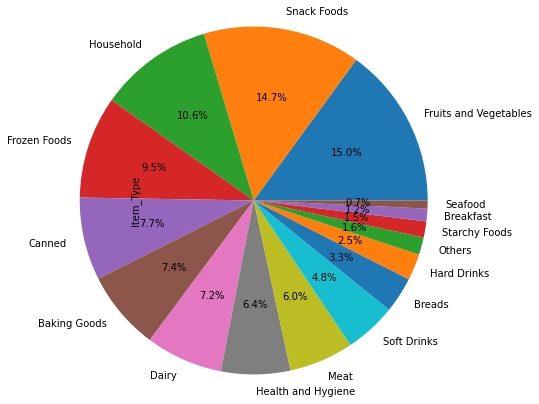

In [122]:
highest_selling['Item_Type'].value_counts().plot(kind = 'pie', radius = 2,autopct = '%0.1f%%');

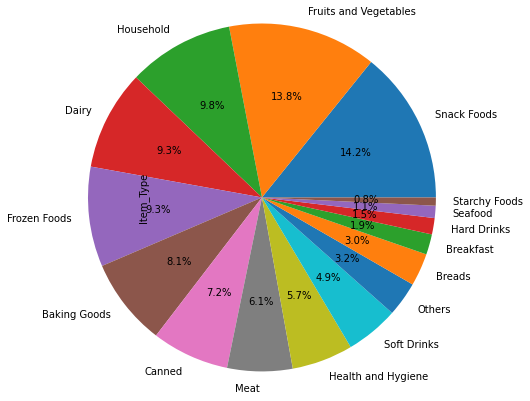

In [123]:
lowest_selling['Item_Type'].value_counts().plot(kind = 'pie', radius = 2,autopct = '%0.1f%%');

- Since the items distribution is very similar, the type of items sold is not a main difference between the highest and lowest selling outlets.

- Also since the number of enteries for the lowest outlets is almost 1/2 of the highest's, bearning the previous fact in mind, the amount of items sold is what makes the difference.

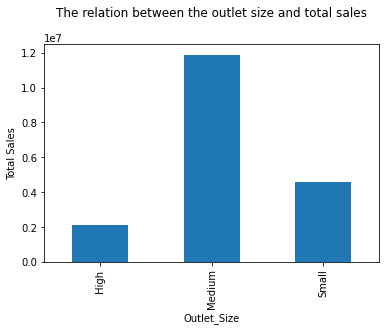

In [124]:
df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum().plot(kind = 'bar');
plt.ylabel('Total Sales');
plt.title('The relation between the outlet size and total sales', y = 1.1);

- Medium-sized outlets are preferable for BigMarts customers.

### Outlet location type effect

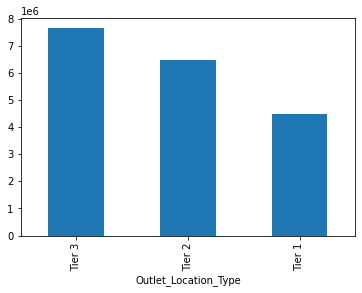

In [125]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum().sort_values(ascending = False).plot(kind='bar');

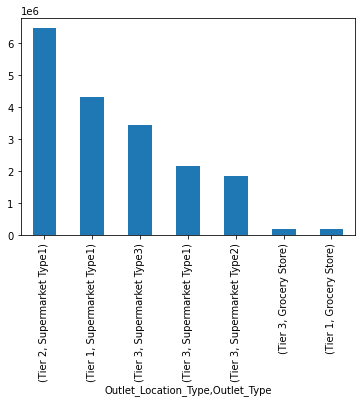

In [126]:
df.groupby(['Outlet_Location_Type', "Outlet_Type"])['Item_Outlet_Sales'].sum().sort_values(ascending = False).plot(kind='bar');

- Further information on the type of each tire and its supermarket is needed for proper conclusions/recommendations.

In [ ]:
# before replacing with mean values, make sure the variable doens't have outliers, extreme values (median good in this case)
# Deleting observations: We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers.

/Users/hendy/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hendy/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hendy/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 84.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hendy/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 60.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/hendy/opt/anaconda3/lib/python3.8/site-packages/s

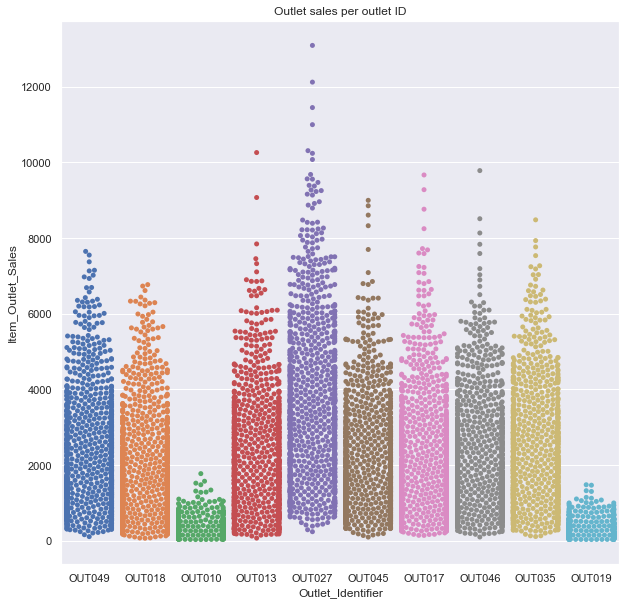

In [127]:
sns.set(rc= {'figure.figsize':(10,10)});
sns.swarmplot(x = df['Outlet_Identifier'], y = df['Item_Outlet_Sales']);
plt.title('Outlet sales per outlet ID');

# Modeling

## Linear Regression

In [128]:
# drop the outlet identifier column as it doesn't carry a lot of information
# it also has a lot of variations that will be hard to deal with using catagorical encoding 
df.drop('Item_Identifier',axis=1, inplace = True)



In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [130]:
# valedating the model for each outlet
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [131]:
y = df['Item_Outlet_Sales']
X = df.drop(['Item_Outlet_Sales'], axis=1)

# splitting for trainning and valedation
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                  train_size=0.8, test_size=0.2,
                                                  random_state=0)


# select object cols to perform ordinal encoding
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

o_encoder = OrdinalEncoder()
X_train[object_cols] = o_encoder.fit_transform(X_train[object_cols])
X_valid[object_cols] = o_encoder.transform(X_valid[object_cols])

# training the model
model = LinearRegression()
model.fit(X_train, y_train)


# print the mean absolute error for the model
print(score_dataset(X_train, X_valid, y_train, y_valid))

910.2150532830741


<ipython-input-131-cc4d8ae597b0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[object_cols] = o_encoder.fit_transform(X_train[object_cols])
/Users/hendy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-131-cc4d8ae597b0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

## Regularization

In [132]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


ridge = Ridge(alpha=0.9)
ridge_model.fit(X_train, y_train)
preds = ridge_model.predict(X_valid)
print('The MAE of the ridge model is',mean_absolute_error(y_valid, preds))

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
preds = lasso_model.predict(X_valid)
print('The MAE of the lasso model is',mean_absolute_error(y_valid, preds))

The MAE of the ridge model is 910.168712800022
The MAE of the lasso model is 910.2119322860481


- Regularization models don't have a drastic effect over the simple linear regression model.

## Random Forest

In [41]:
# Random forest algorithms
from sklearn.ensemble import RandomForestRegressor as rf

random_forest_model = rf(random_state=1)
random_forest_model.fit(X_train,y_train)

predictions = random_forest_model.predict(X_valid)
print('The MAE of a random forest algorith m is:',mean_absolute_error(predictions, y_valid))


The MAE of a random forest algorith m is: 810.6315794346042


- The random forest model is better than linear regression with its variations.
- Let's try improving that model even further!

## XGBoost

In [133]:
from xgboost import XGBRegressor

# regular XGBoost (without parameter adjustment)
xgboost_model_1 = XGBRegressor()
xgboost_model_1.fit(X_train, y_train)
predictions = xgboost_model_1.predict(X_valid)
print('The MAE value for the default xgboost algorithm is:', mean_absolute_error(predictions, y_valid))


The MAE value for the default xgboost algorithm is: 849.948716605201


In [134]:
# paramter adjustment
# Define the model
xgboost_model_2 = XGBRegressor(n_estimators = 1000, learning_rate = 0.01)
xgboost_model_2.fit(X_train,y_train)
predictions_2 = xgboost_model_2.predict(X_valid)

mae_2 = mean_absolute_error(predictions_2, y_valid)
print("Mean Absolute Error:" , mae_2)

Mean Absolute Error: 795.7718325445013


- Let's try one final model.

## Decision Tree

In [135]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(max_leaf_nodes=20, random_state=1)
dtr_model.fit(X_train, y_train)
val_predictions = dtr_model.predict(X_valid)
val_mae = mean_absolute_error(val_predictions, y_valid)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 781


- This is by far the most accurate model.
- The testing results will be estimated using the decision tree model.

# Testing The Model

## Loading the data

In [136]:
testing = pd.read_csv('Test.csv')

In [137]:
testing['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

## Perform the same sort of data cleaning

In [138]:
testing['Item_Weight'].median()

12.5

In [139]:
# we will replace the NaN values in the outlet size column by the mode
testing["Outlet_Size"] = testing["Outlet_Size"].fillna(testing["Outlet_Size"].mode()[0])
# we will replace the NaN values in the item weight column by the median (not mean to account for potenial outliers)
testing["Item_Weight"] = testing["Item_Weight"].fillna(12.5)

In [140]:
# Standardization 
testing['Item_Fat_Content'].replace({'LF':'Low Fat',"low fat":"Low Fat","reg":"Regular"},inplace = True)

In [141]:
testing.drop('Item_Identifier',axis=1, inplace = True) 


In [142]:
testing[object_cols] = o_encoder.transform(testing[object_cols])

# Saving the Model's Results 

In [143]:
# Save test predictions to a file
testing['Predicted_Output'] = dtr_model.predict(testing)
testing.to_csv('predicted_sales.csv', index=False)


